In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
def fit(self, X, y):
   rgen = np.random.RandomState(self.random_state)
   self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) 
   self.cost_ = []
   
   for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input) 
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors) 
      self.w_[0] += self.eta * errors.sum()
      
      # note that we compute the logistic `cost` now
      # instead of the sum of squared errors cost
      cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) 
      self.cost_.append(cost)
   return self

In [5]:
# Đọc dữ liệu từ tệp 'iris.data' và tiền xử lý
df = pd.read_csv('iris.data', header=None)
df.columns = ['sepal length', 'sepal width',
              'petal length', 'petal width', 'class']
df['class'] = np.where(df['class'] == 'Iris-setosa', 1, 0)  # Binary classification, setosa vs. non-setosa


In [6]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df.iloc[:, [1, 2]].values  # Chọn các đặc trưng 'sepal width' và 'petal length'
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [7]:
# Chuẩn hóa dữ liệu (scaling)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [8]:
# Tạo và huấn luyện mô hình Logistic Regression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

# In độ chính xác của mô hình trên tập kiểm tra
y_pred = lr.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


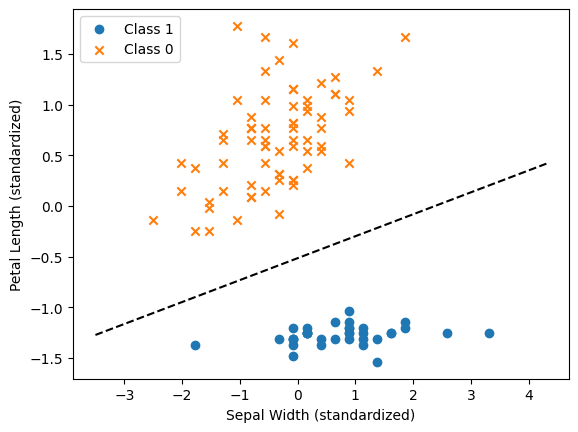

In [9]:
# Vẽ biểu đồ phân tách class
plt.scatter(X_train_std[y_train == 1][:, 0], X_train_std[y_train == 1][:, 1], marker='o', label='Class 1')
plt.scatter(X_train_std[y_train == 0][:, 0], X_train_std[y_train == 0][:, 1], marker='x', label='Class 0')
plt.xlabel('Sepal Width (standardized)')
plt.ylabel('Petal Length (standardized)')
plt.legend(loc='upper left')

# Vẽ đường phân tách
x_point = np.linspace(X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1, 100)
y_point = -(lr.coef_[0, 0] * x_point + lr.intercept_[0]) / lr.coef_[0, 1]
plt.plot(x_point, y_point, color='k', linestyle='--')
plt.show()